# Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

## LSTMs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
bicicletas = pd.read_csv('/content/drive/MyDrive/DeepTime/bikes.csv')

In [5]:
bicicletas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

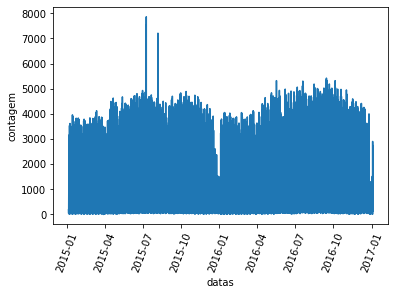

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='datas',y='contagem', data=bicicletas)
plt.xticks(rotation=69)

In [12]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler() #Escolanamento

In [13]:
sc2.fit(bicicletas['contagem'].values.reshape(-1,1))

StandardScaler()

In [14]:
y = sc2.transform(bicicletas['contagem'].values.reshape(-1,1))

## Treino e teste

In [16]:
treino = int(len(bicicletas)*0.9) #90% para treino
teste = len(bicicletas)-tamanho_treino #

In [18]:
y_treino = y[0:treino]
y_teste = y[treino:len(bicicletas)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

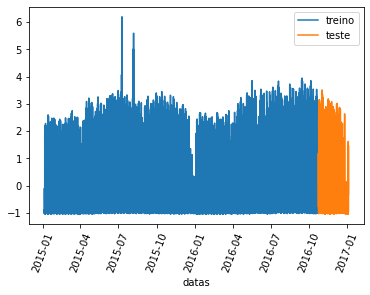

In [19]:
sns.lineplot(x='datas',y=y_treino[:,0],data=bicicletas[0:treino],label='treino') 
sns.lineplot(x='datas',y=y_teste[:,0], data=bicicletas[treino:len(bicicletas)],label='teste')
plt.xticks(rotation=69) 

In [20]:
vetor1 = pd.DataFrame(y_treino)[0]

In [25]:
import numpy as np

def dados_separados(vetor,passos):
  X_n, y_n = [], []
  for i in range(passos,vetor.shape[0]):
    X_n.append(list(vetor.loc[i-passos:i-1]))
    y_n.append(vetor.loc[i])
  X_n, y_n = np.array(X_n), np.array(y_n) 
  return X_n, y_n

In [26]:
x_treino_n, y_treino_n = dados_separados(vetor1,10)

In [27]:
x_treino_n[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [28]:
y_treino_n[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [29]:
vetor2 = pd.DataFrame(y_teste)[0]

In [30]:
x_teste_n, y_teste_n = dados_separados(vetor2,10)

### Entradas

Quantidade de amostras, passos no tempo, atributos a cada passo no tempo.

In [31]:
x_treino_n = x_treino_n.reshape((x_treino_n.shape[0],x_treino_n.shape[1],1))

In [32]:
x_treino_n.shape

(15662, 10, 1)

In [33]:
x_teste_n = x_teste_n.reshape((x_teste_n.shape[0],x_teste_n.shape[1],1))

## LSTM

In [39]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
rnn = Sequential()

In [41]:
rnn.add(LSTM(128, input_shape=(x_treino_n.shape[1],x_treino_n.shape[2])))
rnn.add(Dense(units=1))

In [42]:
rnn.compile(loss='mean_squared_error',optimizer='RMSProp')
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [43]:
resultado_treino = rnn.fit(x_treino_n,y_treino_n,validation_data=(x_teste_n,y_teste_n),epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 12ms/step - loss: 0.2524 - val_loss: 0.0678
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0785 - val_loss: 0.0488
Epoch 3/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0557 - val_loss: 0.0322
Epoch 4/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0474 - val_loss: 0.0321
Epoch 5/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0432 - val_loss: 0.0250
Epoch 6/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0396 - val_loss: 0.0226
Epoch 7/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0375 - val_loss: 0.0364
Epoch 8/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0354 - val_loss: 0.0209
Epoch 9/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0346 - val_loss: 0.0247
Epoch 10/100
490/490 [==============================] - 7s 15ms/step - loss: 0.033

In [44]:
ajuste_y = rnn.predict(x_treino_n)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

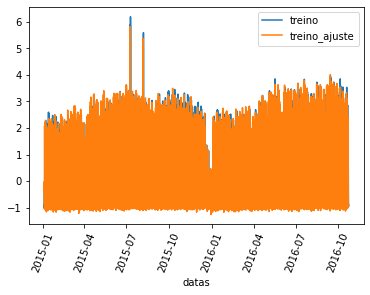

In [46]:
sns.lineplot(x='datas',y=y_treino[:,0],data=bicicletas[0:treino],label='treino')
sns.lineplot(x='datas',y=ajuste_y[:,0],data=bicicletas[0:15662],label='treino_ajuste')
plt.xticks(rotation=69) 

In [47]:
predicao_y = rnn.predict(x_teste_n)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

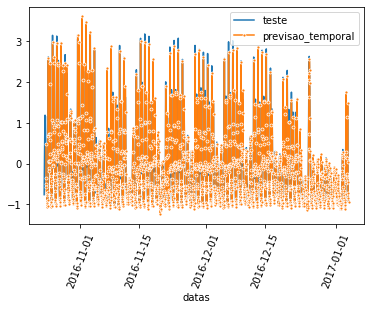

In [48]:
sns.lineplot(x='datas',y=y_teste[:,0], data=bicicletas[treino:len(bicicletas)],label='teste')
sns.lineplot(x='datas',y=predicao_y[:,0], data=bicicletas[treino+10:len(bicicletas)],marker='.',label='previsao_temporal')
plt.xticks(rotation=69) 